##### TESTE TECNICO APPMAX
1) Considere que você é o cientista de dados responsável pela análise do comportamento e evolução do balanço final da empresa mês a mês, para tal, foi disponibilizado um arquivo (metricas_financeiras_mensais) com duas colunas, uma com a data de apuração do balanço financeiro e outra com o valor em reais do balanço no mês de referência. Sendo assim, foram solicitadas as seguintes informações para a tomada de decisões futuras:

- a) Quais os 5 meses com o melhor fechamento de balanço e quais os 5 meses com o pior fechamento de balanço?

- b) Qual foi o melhor ano para a empresa em termos de ganho total? Qual a média de fechamento de balanço ano a ano? A média e a mediana se aproximam? Em caso de negativa, explique o motivo.

- c) Qual o maior período de meses com o maior somatório de balanço ininterrupto? Em que mês se inicia e finaliza esse período e qual o valor total do mesmo? Como base para responder essas questões, considere o seguinte exemplo:
lista_exemplo=[1,1,2,4,-5,20,-100,22]
A faixa de maior soma se dá entre o primeiro e o sexto termo da lista, visto
que, 1+1+2+4-5+20=23.

- d) Se fosse solicitado para que você estimasse o balanço final dos meses de
outubro, novembro e dezembro de 2024 considerando o comportamento
observado nos meses anteriores, qual seria a sua estratégia para abordar o
problema?

2) Suponha que você esteja participando de um projeto voltado à mitigação de fraudes,
e para tal, você deve analisar dados diversos, tais como o CPF, Telefone Celular
(Com DDD incluso) e entre outros. Com isso em mente, responda às seguintes
questões:

a) Quais critérios você utilizaria para indicar se o CPF é válido em termos
estruturais? Construa um algoritmo para automatizar esse processo e realize
um teste com os seguintes CPFs, indicando aqueles que são válidos ou não:
- 217.894.500-71
- 112.622.670-05
- 695.226.930-49
- 015.897.070-51
- 311.692.760-06

b) Quais critérios você utilizaria para indicar se um telefone celular é válido ou
não em termos estruturais? Construa um algoritmo para automatizar esse
processo e realize um teste com os seguintes telefones, indicando aqueles
que são válidos ou não:
- (64) 96743-8065
- (75) 89555-5682
- (99) 98362-0347
- (10) 98595-1389

c) Erros e variações de escrita são comuns em processos de preenchimento de
dados como nomes. Com isso em mente, qual estratégia você tomaria para
que em um contexto de avaliação, um modelo retornasse True para as
seguintes comparações:
- Fernando dos Santos / Fernando Santos
- Maria da Silva Rodrigues / Maria Rodrigues
- João Roberto / joao robert

3) Solicitaram para você que seja criado um modelo de apuração de métricas de
processamento em relação ao valor, quantidade de vendas e método de pagamento.
Para tal, uma base de dados (metricas_dados_de_pagamento) foi disponibilizada
como referencial, contendo as colunas user_id (Representa o parceiro analisado),
mes_ano, metodo_pagamento, status_finalizacao, qtd_total (Quantidade de
transações) e tpv (Valor total processado). Para o fechamento de receita, são
considerados apenas os pedidos finalizados em integrado, sendo assim, os
questionamentos são os seguintes:

- a) Qual parceiro (user_id) possui o maior processamento em termos de TPV em
cada um dos meses?
- b) Em qual dos meses ocorre o pico de processamento de cartão de crédito?
- c) Parceiros supremos são aqueles que possuem média de processamento
total superior a 300 mil reais olhando para um período de 3 meses de
processamento, com isso em mente, quantos e quais são os parceiros
supremos contidos na base?
- d) Analisar a estabilidade do processamento dos parceiros é um dos pontos
vitais para a manutenção da saúde processual de uma fintech, com isso em
mente, em termos percentuais e inteiros, qual foi a oscilação do total de
parceiros com processamento maior do que zero de agosto para setembro

Sobre as Variáveis:

Base Métricas de Pagamento

- mes_ano: Refere-se ao mês e ano em que uma transação ou evento ocorreu
- metodo_pagamento: Indica o método de pagamento utilizado para a transação, como cartão de crédito, débito, transferência bancária, pagamento em dinheiro, etc.

- status_finalizacao: Refere-se ao estado final da transação ou processo. 

- qtd_total: Representa a quantidade total de itens ou transações. 

- tpv: Normalmente significa "Total de Pagamentos por Valor" ou "Terminal de Ponto de Venda". 

- user_id: Um identificador único para o usuário que realizou a transação. 

Base Métricas Mensais

- Data: Refere-se a data geral dos valores mensais dos balanços finais

- Balanço Final: Indica o saldo financeiro final para o período especificado na coluna Data. 

# 1. BIBLIOTECAS

In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [56]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

# 2. IMPORTANDO ARQUIVOS CSV

In [57]:
df_metricas_pagamento = pd.read_csv(r'C:\Users\user\Desktop\Estudos_Data_Science\Case_tecnico_CDJ\metricas_dados_de_pagamento.csv')

df_metricas_mensais = pd.read_csv(r'C:\Users\user\Desktop\Estudos_Data_Science\Case_tecnico_CDJ\metricas_financeiras_mensais.csv')

# 4. EDA

## 4.1 EDA df_pagamento

Análise dos meses de Julho, Agosto e Setembro

In [58]:

df_metricas_pagamento.head(10)

,mes_ano,metodo_pagamento,status_finalizacao,qtd_total,tpv,user_id
0,2024-08,CreditCard,integrado,25,5400.20,1
1,2024-07,CreditCard,cancelado,133,14704.70,1
2,2024-08,CreditCard,cancelado,130,14830.37,1
3,2024-07,CreditCard,recusado_por_risco,2,259.80,1
4,2024-09,CreditCard,recusado_por_risco,4,309.60,1
5,2024-07,CreditCard,integrado,36,5345.00,1
6,2024-09,CreditCard,cancelado,85,8662.46,1
7,2024-09,CreditCard,integrado,13,2512.09,1
8,2024-08,CreditCard,recusado_por_risco,1,179.80,1
9,2024-08,Pix,cancelado,27,3447.64,2


In [59]:
# Dimensao da tebela
print("""
    Linhas: {}
    Colunas: {}""".format(df_metricas_pagamento.shape[0], df_metricas_pagamento.shape[1]))


    Linhas: 86128
    Colunas: 6


In [60]:
# Tipo de dados
df_metricas_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86128 entries, 0 to 86127
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mes_ano             86128 non-null  object 
 1   metodo_pagamento    85078 non-null  object 
 2   status_finalizacao  86128 non-null  object 
 3   qtd_total           86128 non-null  int64  
 4   tpv                 86128 non-null  float64
 5   user_id             86128 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.9+ MB


In [61]:
# Valores distintos de cada variável (sem considerar nulos na contagem)
df_metricas_pagamento.nunique(dropna=True).sort_values(ascending=False)

tpv                   63860
user_id               18374
qtd_total              1413
mes_ano                   3
metodo_pagamento          3
status_finalizacao        3
dtype: int64

In [62]:
# Quantidade de valores nulo
df_metricas_pagamento.isna().sum()

mes_ano                  0
metodo_pagamento      1050
status_finalizacao       0
qtd_total                0
tpv                      0
user_id                  0
dtype: int64

In [63]:
#percentual de valores nulos da coluna metodo de pagamento
porcentagem_nulos = df_metricas_pagamento['metodo_pagamento'].isnull().sum() / df_metricas_pagamento.shape[0]*100
print(f'percentual de valores nulos da coluna método de pagamento: {porcentagem_nulos:.2f} %')

percentual de valores nulos da coluna método de pagamento: 1.22 %


In [64]:
# transformar coluna mes_ano para tipo datetime

df_metricas_pagamento['mes_ano'] = pd.to_datetime(df_metricas_pagamento['mes_ano'], format=('%Y-%m') )


In [65]:
# Definições de variáveis de acordo com seu tipo.
numericas = list(df_metricas_pagamento.select_dtypes('number').columns)
categoricas = list(df_metricas_pagamento.select_dtypes(object).columns)

# Remoção da chave de identificação.
numericas.remove('user_id')

4.2 Variáveis numéricas:

In [66]:
df_metricas_pagamento[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
qtd_total,86128.0,52.539116,5.069875e+02,1.00,1.0000,4.000,18.0000,5.607900e+04
tpv,86128.0,43326.453951,6.951692e+06,-707.01,241.9425,924.085,4897.0425,1.999161e+09


4.3 Variáveis categóricas: 

In [67]:
df_metricas_pagamento[categoricas].describe().T

,count,unique,top,freq
metodo_pagamento,85078,3,CreditCard,41594
status_finalizacao,86128,3,integrado,41061


 4.4 Análise da distribuição de valores por variável

In [68]:
df_metricas_pagamento.columns

Index(['mes_ano', 'metodo_pagamento', 'status_finalizacao', 'qtd_total', 'tpv',
       'user_id'],
      dtype='object')

In [69]:
df_metricas_pagamento['mes_ano'].value_counts()

mes_ano
2024-07-01    31085
2024-08-01    28929
2024-09-01    26114
Name: count, dtype: int64

In [70]:
df_metricas_pagamento['metodo_pagamento'].value_counts()

metodo_pagamento
CreditCard    41594
Pix           37825
Boleto         5659
Name: count, dtype: int64

In [71]:
df_metricas_pagamento['status_finalizacao'].value_counts()

status_finalizacao
integrado             41061
cancelado             37341
recusado_por_risco     7726
Name: count, dtype: int64

In [72]:
df_metricas_pagamento['qtd_total'].value_counts()

qtd_total
1        24886
2        10836
3         6340
4         4268
5         3166
         ...  
13631        1
727          1
1155         1
8726         1
4812         1
Name: count, Length: 1413, dtype: int64

In [73]:
df_metricas_pagamento['user_id'].value_counts()

user_id
629      24
9133     24
2499     23
359      23
770      23
         ..
12748     1
12746     1
12744     1
12742     1
18374     1
Name: count, Length: 18374, dtype: int64

In [74]:
df_metricas_pagamento['user_id'].nunique()

18374

In [75]:
df_metricas_pagamento['tpv'].value_counts()

tpv
5.00       391
10.00      231
0.00       208
89.90      173
1.00       171
          ... 
1825.79      1
1471.91      1
2047.87      1
6779.20      1
118.23       1
Name: count, Length: 63860, dtype: int64

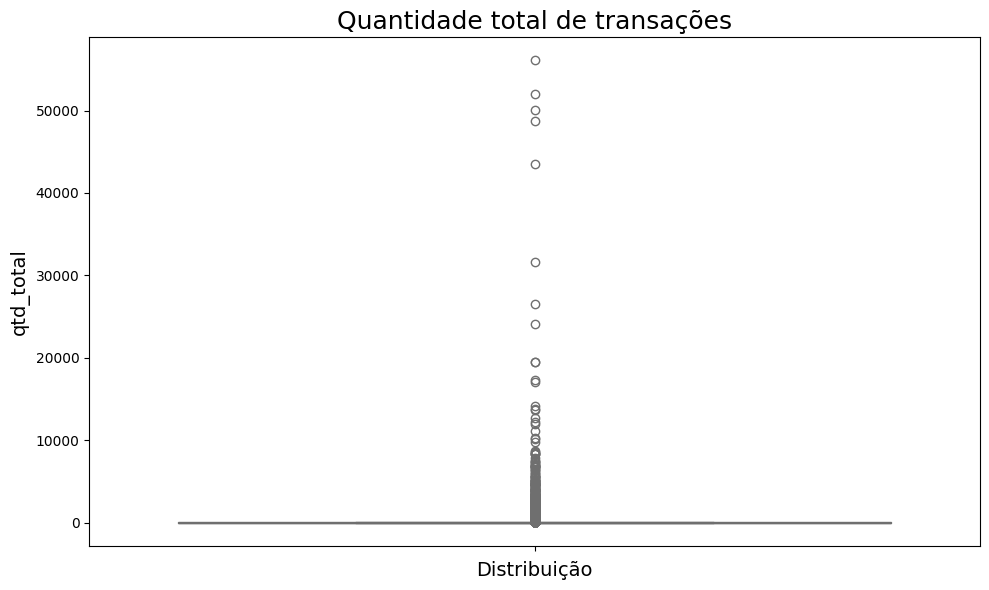

In [93]:
#verificar Outliers:
plt.figure(figsize=(10, 6))

# Criar o box plot
sns.boxplot(y='qtd_total', data=df_metricas_pagamento, color='skyblue')
plt.title('Quantidade total de transações', fontsize=18)
plt.ylabel('qtd_total', fontsize=14)
plt.xlabel('Distribuição', fontsize=14)

plt.tight_layout()
plt.show()



## EDA df_métricas_mensais

In [76]:
df_metricas_mensais.head()

,Data,Balanço Final
0,2010-01,32411.56
1,2010-02,-62423.96
2,2010-03,135070.95
3,2010-04,-94712.30
4,2010-05,4944.98


In [77]:
# Dimensao da tebela
print("""
    Linhas: {}
    Colunas: {}""".format(df_metricas_mensais.shape[0], df_metricas_mensais.shape[1]))


    Linhas: 177
    Colunas: 2


In [78]:
df_metricas_mensais['Data'].value_counts()

Data
2010-01    1
2017-06    1
2019-06    1
2019-07    1
2019-08    1
2019-09    1
2019-10    1
2019-11    1
2019-12    1
2020-01    1
2020-02    1
2020-03    1
2020-04    1
2020-05    1
2020-06    1
2020-07    1
2020-08    1
2020-09    1
2020-10    1
2020-11    1
2020-12    1
2019-05    1
2019-04    1
2019-03    1
2018-04    1
2017-08    1
2017-09    1
2017-10    1
2017-11    1
2017-12    1
2018-01    1
2018-02    1
2018-03    1
2018-05    1
2019-02    1
2018-06    1
2018-07    1
2018-08    1
2018-09    1
2018-10    1
2018-11    1
2018-12    1
2019-01    1
2021-01    1
2021-02    1
2021-03    1
2023-11    1
2023-03    1
2023-04    1
2023-05    1
2023-06    1
2023-07    1
2023-08    1
2023-09    1
2023-10    1
2023-12    1
2023-01    1
2024-01    1
2024-02    1
2024-03    1
2024-04    1
2024-05    1
2024-06    1
2024-07    1
2024-08    1
2023-02    1
2022-12    1
2021-04    1
2022-01    1
2021-05    1
2021-06    1
2021-07    1
2021-08    1
2021-09    1
2021-10    1
2021-11    1
2021-12

In [79]:
df_metricas_mensais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           177 non-null    object 
 1   Balanço Final  177 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [80]:
df_metricas_mensais.isna().sum()

Data             0
Balanço Final    0
dtype: int64

In [81]:
# Valores distintos de cada variável (sem considerar nulos na contagem)
df_metricas_mensais.nunique(dropna=True).sort_values(ascending=False)

Data             177
Balanço Final    177
dtype: int64

In [82]:
# transformar coluna Data para tipo datetime
df_metricas_mensais['Data'] = pd.to_datetime(df_metricas_mensais['Data'], format=('%Y-%m') )

In [83]:
df_metricas_mensais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           177 non-null    datetime64[ns]
 1   Balanço Final  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [84]:
df_metricas_mensais.head()

,Data,Balanço Final
0,2010-01-01,32411.56
1,2010-02-01,-62423.96
2,2010-03-01,135070.95
3,2010-04-01,-94712.30
4,2010-05-01,4944.98


In [85]:
df_metricas_mensais['Data'].nunique()

177

In [86]:
df_metricas_mensais.describe()

,Data,Balanço Final
count,177,177.000000
mean,2017-05-01 15:43:43.728813568,-1832.116271
min,2010-01-01 00:00:00,-245650.860000
25%,2013-09-01 00:00:00,-59004.140000
50%,2017-05-01 00:00:00,-3043.120000
75%,2021-01-01 00:00:00,67170.960000
max,2024-09-01 00:00:00,268988.610000
std,NaN,104087.153158


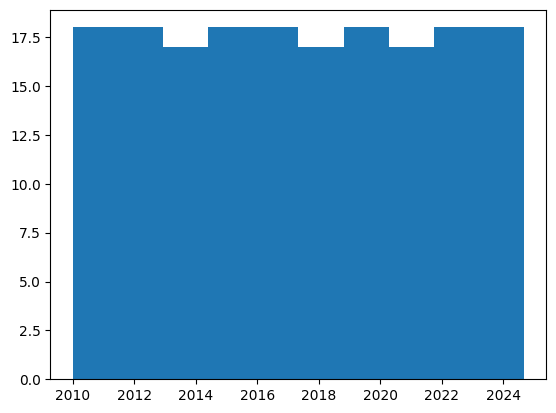

In [87]:
plt.hist(x = df_metricas_mensais['Data']);

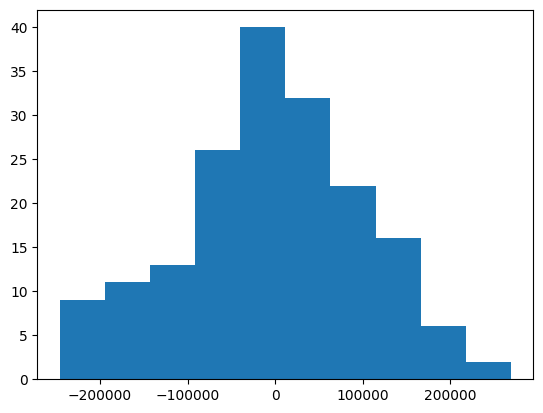

In [88]:
plt.hist(x = df_metricas_mensais['Balanço Final']);

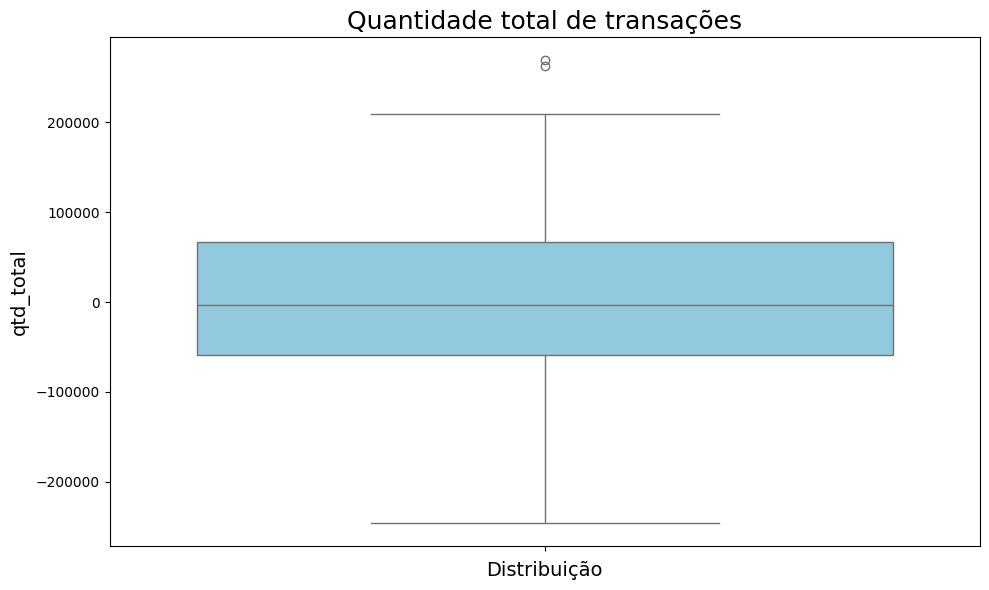

In [94]:
#verificar Outliers:
plt.figure(figsize=(10, 6))

# Criar o box plot
sns.boxplot(y='Balanço Final', data=df_metricas_mensais, color='skyblue')
plt.title('Quantidade total de transações', fontsize=18)
plt.ylabel('qtd_total', fontsize=14)
plt.xlabel('Distribuição', fontsize=14)

plt.tight_layout()
plt.show()

In [96]:

# Verificar a coluna 'Balanço Final' para identificar outliers

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df_metricas_mensais['Balanço Final'].quantile(0.25)
Q3 = df_metricas_mensais['Balanço Final'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df_metricas_mensais[(df_metricas_mensais['Balanço Final'] < limite_inferior) | 
                                (df_metricas_mensais['Balanço Final'] > limite_superior)]


print("Outliers identificados:")
print(outliers)
num_outliers = outliers.shape[0]
print(f"Número de outliers: {num_outliers}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")


Outliers identificados:
         Data  Balanço Final
13 2011-02-01      263324.75
63 2015-04-01      268988.61
Número de outliers: 2
Limite inferior: -248266.79000000004
Limite superior: 256433.61000000004
